In [1]:
cd ..

/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 4/trapezoidal_LF_model


/Users/igor.velikorechanin/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from utils.benchmark_utils import test_lr_data_finetuning
from utils.plot_utils import plot_lr_finetuning_comparison

### LR Study on Data - Heat Equation

#### Data Correction - **None**


LR FINETUNING STUDY: HEAT | mode=none

RUN 1/5

  [Pretrain] lr=0.005, 200 epochs...

LF-PINN Theta Params
PDE: heat | Mode: none
Steps: 4 | Iterations: 2
Base theta_net params: 13
Correction params: 0
Total trainable: 13

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 200 epochs, 34.7s, L2RE=1.23e-02
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.23e-02 → 1.00e-02 (+18.5%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.23e-02 → 6.92e-03 (+43.9%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.23e-02 → 5.18e-03 (+58.0%), 1000 epochs
  [Finetune] lr=0.001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.23e-02 → 4.81e-03 (+61.0%), 1000 epochs
  [F

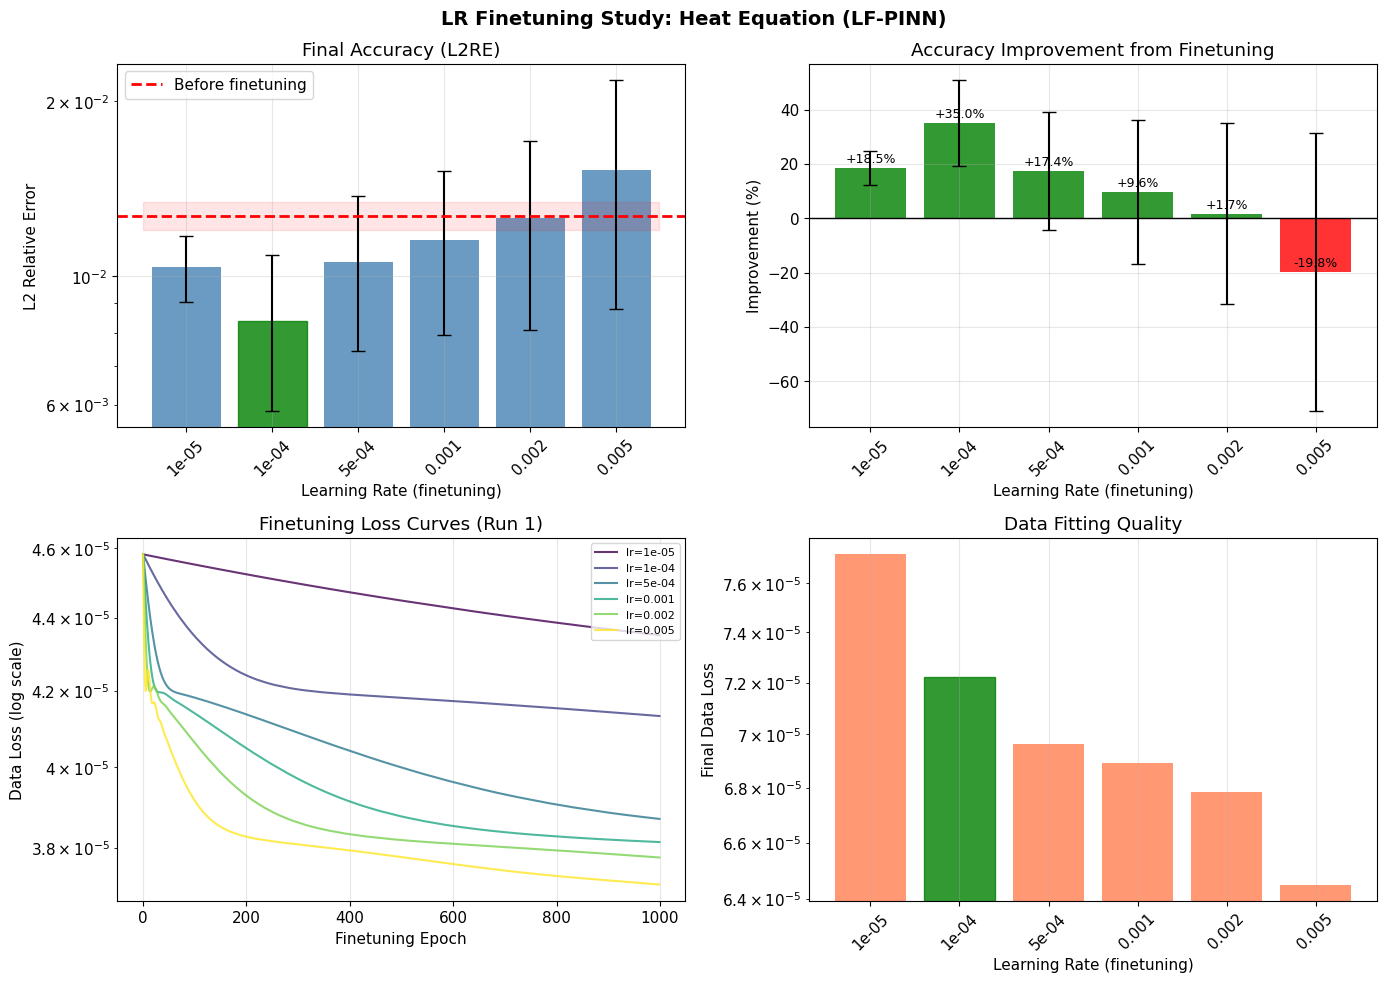


LR Finetuning Study: Heat Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.27e-02 ± 6.89e-04         --                   --           --             
0.00001      1.04e-02 ± 1.35e-03      +18.5% ± 6.4%        1000         7.72e-05       
0.00010      8.37e-03 ± 2.50e-03      +35.0% ± 15.7%       1000         7.22e-05        ← BEST
0.00050      1.06e-02 ± 3.16e-03      +17.4% ± 21.8%       1000         6.96e-05       
0.00100      1.16e-02 ± 3.63e-03      +9.6% ± 26.4%        1000         6.89e-05       
0.00200      1.26e-02 ± 4.50e-03      +1.7% ± 33.4%        1000         6.79e-05       
0.00500      1.53e-02 ± 6.48e-03      -19.8% ± 51.0%       1000         6.45e-05       


In [3]:
results_heat = test_lr_data_finetuning(
    'heat',
    pretrain_epochs=200,
    finetune_epochs=1000,
    n_runs=5,
    n_data=50,
    noise_level=0.05, 
    correction_mode='none'
)

best_lr = plot_lr_finetuning_comparison(results_heat, 'Heat Equation')

#### Data Correction - **Per Step (Layer) Bias**


LR FINETUNING STUDY: HEAT | mode=per_step_bias

RUN 1/5

  [Pretrain] lr=0.005, 200 epochs...

LF-PINN Theta Params
PDE: heat | Mode: per_step_bias
Steps: 4 | Iterations: 2
Base theta_net params: 13
Correction params: 4
Total trainable: 17

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 200 epochs, 33.4s, L2RE=1.23e-02
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.23e-02 → 8.99e-03 (+27.1%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.23e-02 → 7.37e-03 (+40.3%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.23e-02 → 6.60e-03 (+46.5%), 1000 epochs
  [Finetune]

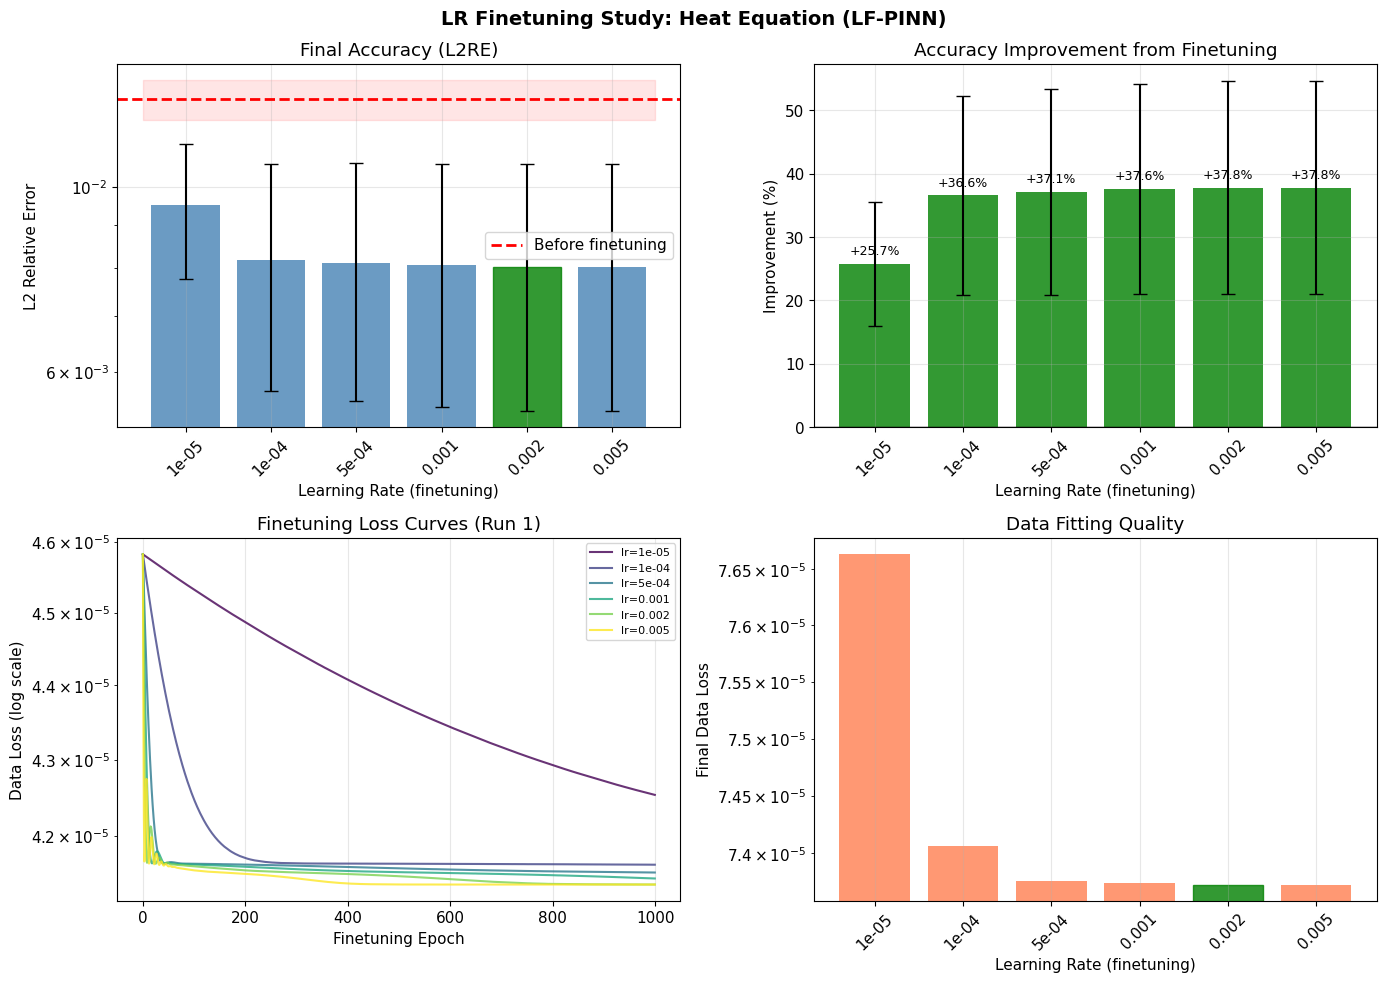


LR Finetuning Study: Heat Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.27e-02 ± 6.89e-04         --                   --           --             
0.00001      9.50e-03 ± 1.74e-03      +25.7% ± 9.8%        1000         7.66e-05       
0.00010      8.17e-03 ± 2.48e-03      +36.6% ± 15.7%       1000         7.41e-05       
0.00050      8.11e-03 ± 2.57e-03      +37.1% ± 16.3%       1000         7.38e-05       
0.00100      8.05e-03 ± 2.61e-03      +37.6% ± 16.6%       1000         7.37e-05       
0.00200      8.02e-03 ± 2.63e-03      +37.8% ± 16.8%       1000         7.37e-05        ← BEST
0.00500      8.02e-03 ± 2.63e-03      +37.8% ± 16.8%       1000         7.37e-05       


In [4]:
results_heat = test_lr_data_finetuning(
    'heat',
    pretrain_epochs=200,
    finetune_epochs=1000,
    n_runs=5,
    n_data=50,
    noise_level=0.05, 
    correction_mode='per_step_bias'
)

best_lr = plot_lr_finetuning_comparison(results_heat, 'Heat Equation')

#### Data Correction - **Per Step (Layer) Gate**


LR FINETUNING STUDY: HEAT | mode=per_step_gate

RUN 1/5

  [Pretrain] lr=0.005, 200 epochs...

LF-PINN Theta Params
PDE: heat | Mode: per_step_gate
Steps: 4 | Iterations: 2
Base theta_net params: 13
Correction params: 8
Total trainable: 21

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 200 epochs, 34.5s, L2RE=1.23e-02
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: per_step_gate)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.23e-02 → 1.01e-02 (+17.9%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: per_step_gate)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.23e-02 → 9.56e-03 (+22.5%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: per_step_gate)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.23e-02 → 7.95e-03 (+35.5%), 1000 epochs
  [Finetune]

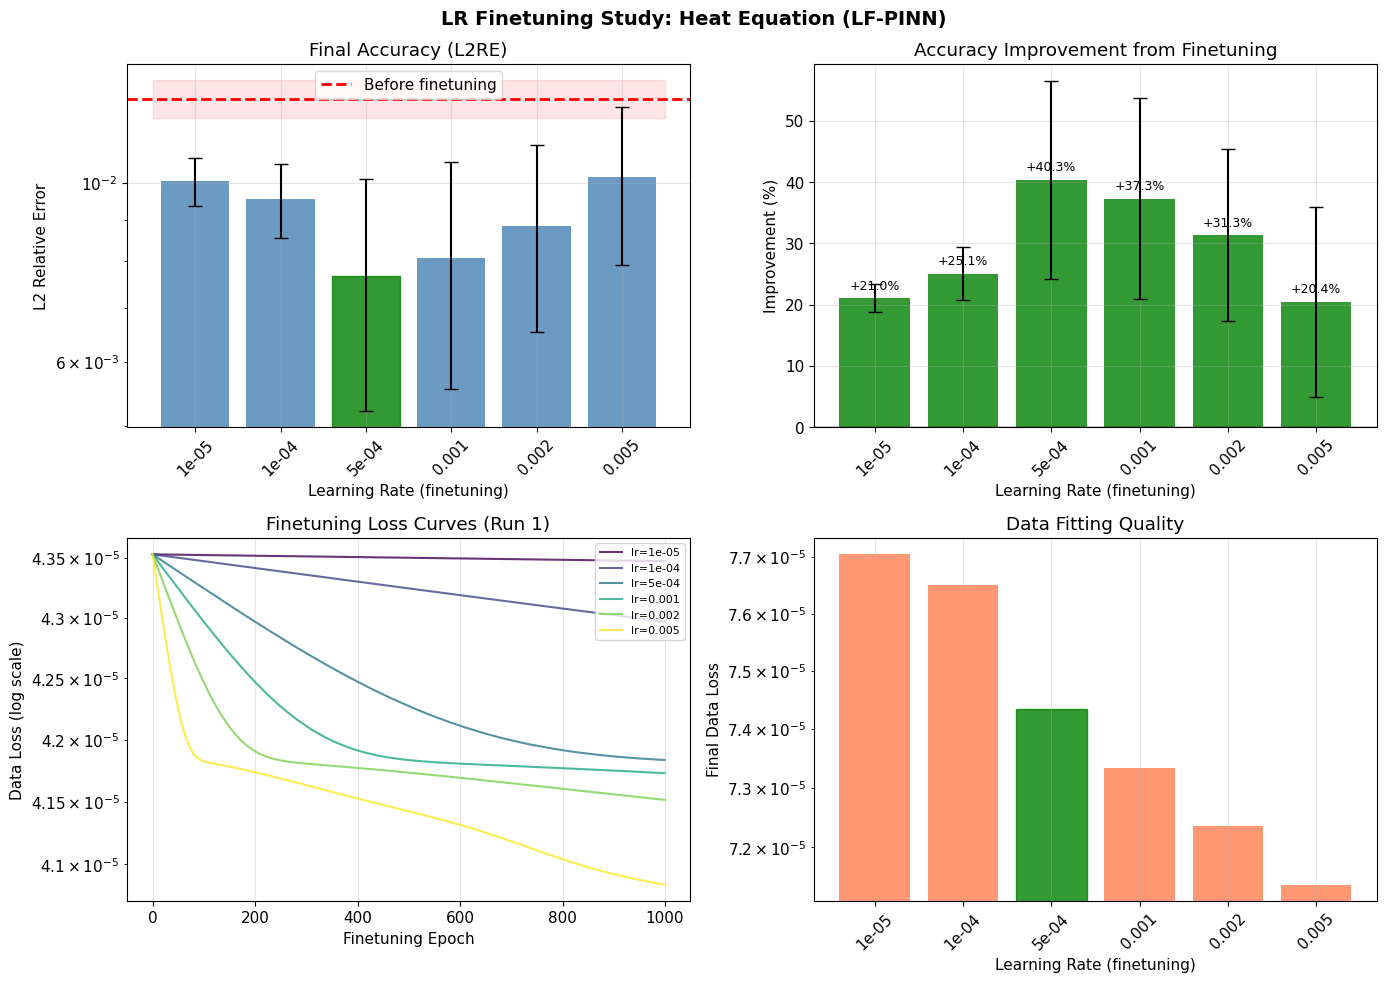


LR Finetuning Study: Heat Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.27e-02 ± 6.89e-04         --                   --           --             
0.00001      1.00e-02 ± 6.81e-04      +21.0% ± 2.3%        1000         7.70e-05       
0.00010      9.55e-03 ± 1.02e-03      +25.1% ± 4.4%        1000         7.65e-05       
0.00050      7.67e-03 ± 2.45e-03      +40.3% ± 16.2%       1000         7.43e-05        ← BEST
0.00100      8.08e-03 ± 2.53e-03      +37.3% ± 16.4%       1000         7.33e-05       
0.00200      8.83e-03 ± 2.31e-03      +31.3% ± 14.0%       1000         7.23e-05       
0.00500      1.02e-02 ± 2.25e-03      +20.4% ± 15.4%       1000         7.14e-05       


In [5]:
results_heat = test_lr_data_finetuning(
    'heat',
    pretrain_epochs=200,
    finetune_epochs=1000,
    n_runs=5,
    n_data=50,
    noise_level=0.05, 
    correction_mode='per_step_gate'
)

best_lr = plot_lr_finetuning_comparison(results_heat, 'Heat Equation')

### LR Study on Data - Wave Equation

#### Data Correction - **None**


LR FINETUNING STUDY: WAVE | mode=none

RUN 1/5

  [Pretrain] lr=0.001, 150 epochs...

LF-PINN Theta Params
PDE: wave | Mode: none
Steps: 3 | Iterations: 3
Base theta_net params: 13
Correction params: 0
Total trainable: 13

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 150 epochs, 114.3s, L2RE=3.11e-02
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 3.11e-02 → 3.11e-02 (-0.0%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 3.11e-02 → 3.12e-02 (-0.2%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 3.11e-02 → 3.54e-02 (-13.7%), 1000 epochs
  [Finetune] lr=0.001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 3.11e-02 → 4.12e-02 (-32.6%), 1000 epochs
  [Fi

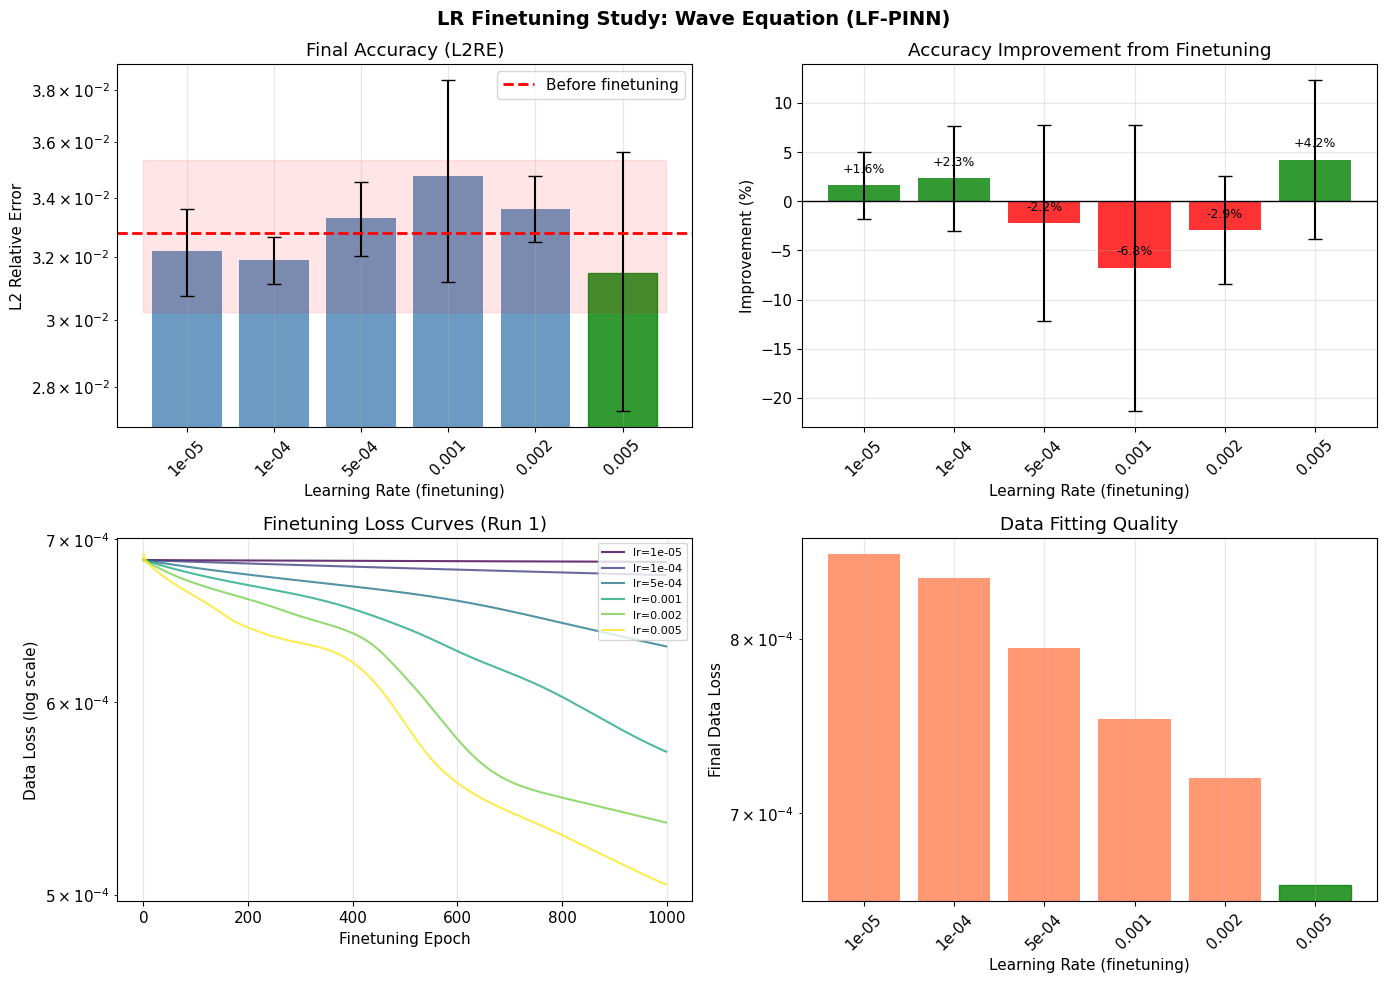


LR Finetuning Study: Wave Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     3.28e-02 ± 2.54e-03         --                   --           --             
0.00001      3.22e-02 ± 1.44e-03      +1.6% ± 3.4%         1000         8.53e-04       
0.00010      3.19e-02 ± 7.68e-04      +2.3% ± 5.3%         1000         8.38e-04       
0.00050      3.33e-02 ± 1.27e-03      -2.2% ± 10.0%        1000         7.94e-04       
0.00100      3.48e-02 ± 3.58e-03      -6.8% ± 14.5%        1000         7.52e-04       
0.00200      3.36e-02 ± 1.14e-03      -2.9% ± 5.5%         1000         7.19e-04       
0.00500      3.15e-02 ± 4.16e-03      +4.2% ± 8.1%         1000         6.63e-04        ← BEST


In [10]:
results_wave = test_lr_data_finetuning(
    'wave',
    n_runs=5,
    pretrain_epochs=150,
    finetune_epochs=1000,
    n_data=50,
    noise_level=0.05,
    correction_mode='none'
)

best_lr = plot_lr_finetuning_comparison(results_wave, 'Wave Equation')

#### Data Correction - **RHS Scale**


LR FINETUNING STUDY: WAVE | mode=rhs_scale

RUN 1/5

  [Pretrain] lr=0.001, 150 epochs...

LF-PINN Theta Params
PDE: wave | Mode: rhs_scale
Steps: 3 | Iterations: 3
Base theta_net params: 13
Correction params: 3
Total trainable: 16

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 150 epochs, 88.2s, L2RE=3.11e-02
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 3.11e-02 → 1.95e-02 (+37.2%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 3.11e-02 → 1.50e-02 (+51.7%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 3.11e-02 → 1.50e-02 (+51.8%), 1000 epochs
  [Finetune] lr=0.001... [ThetaP

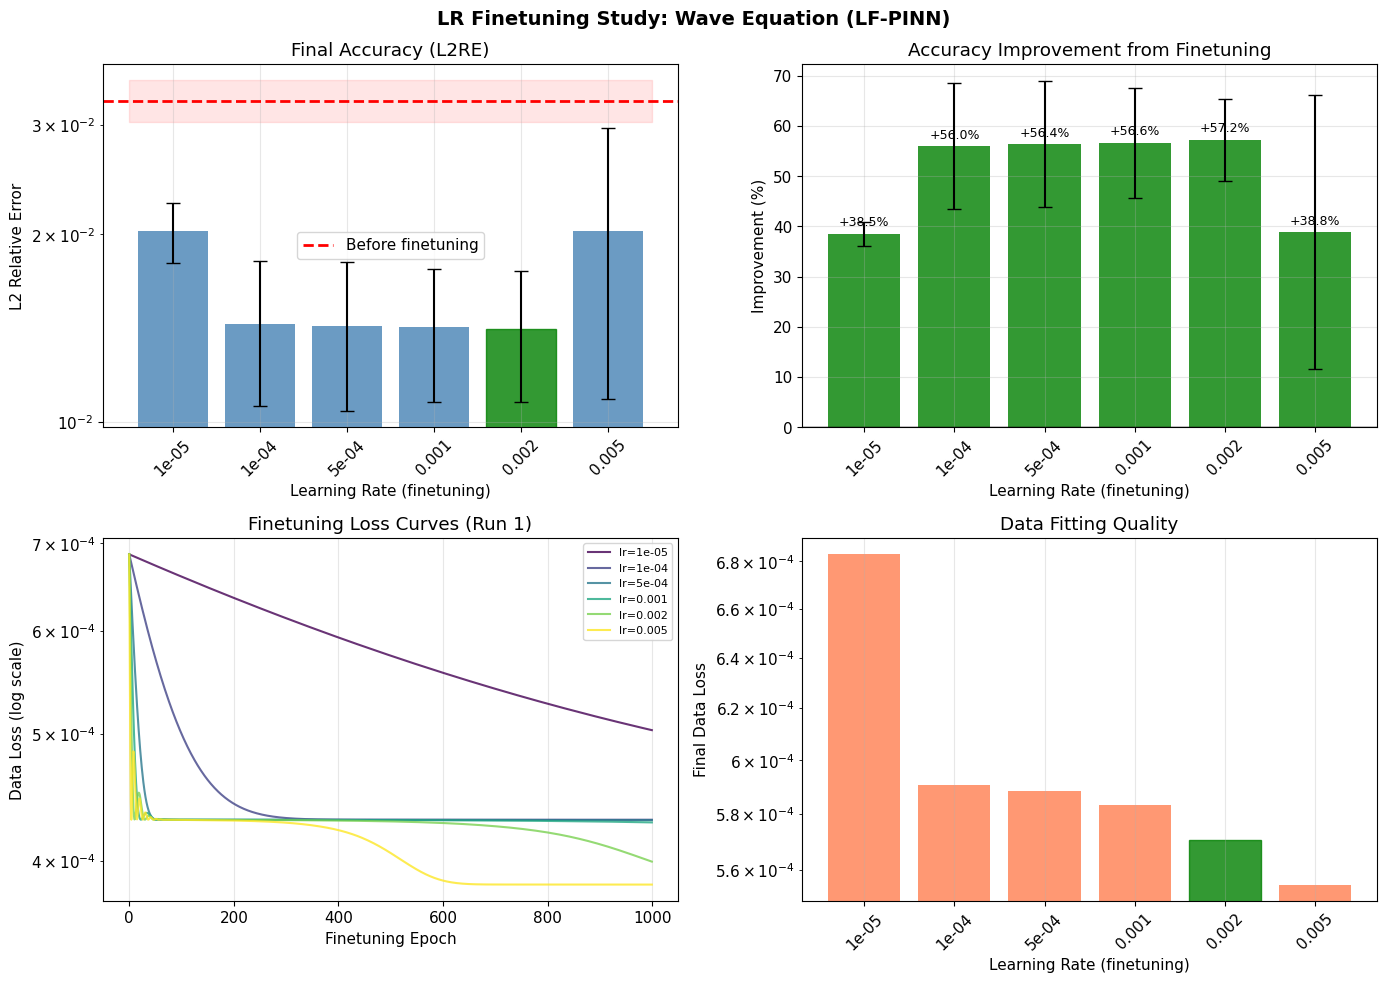


LR Finetuning Study: Wave Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     3.28e-02 ± 2.54e-03         --                   --           --             
0.00001      2.02e-02 ± 2.23e-03      +38.5% ± 2.3%        1000         6.83e-04       
0.00010      1.44e-02 ± 3.77e-03      +56.0% ± 12.5%       1000         5.91e-04       
0.00050      1.42e-02 ± 3.81e-03      +56.4% ± 12.6%       1000         5.89e-04       
0.00100      1.42e-02 ± 3.42e-03      +56.6% ± 11.0%       1000         5.84e-04       
0.00200      1.41e-02 ± 3.33e-03      +57.2% ± 8.1%        1000         5.71e-04        ← BEST
0.00500      2.02e-02 ± 9.37e-03      +38.8% ± 27.3%       1000         5.55e-04       


In [11]:
results_wave = test_lr_data_finetuning(
    'wave',
    n_runs=5,
    pretrain_epochs=150,
    finetune_epochs=1000,
    n_data=50,
    noise_level=0.05,
    correction_mode='rhs_scale'
)

best_lr = plot_lr_finetuning_comparison(results_wave, 'Wave Equation')

#### Data Correction - **Per Step (Layer) Bias**


LR FINETUNING STUDY: WAVE | mode=time_gate+rhs_scale

RUN 1/5

  [Pretrain] lr=0.001, 150 epochs...

LF-PINN Theta Params
PDE: wave | Mode: time_gate+rhs_scale
Steps: 3 | Iterations: 3
Time anchors: 5 | t_max: 1.0
Base theta_net params: 13
Correction params: 13
Total trainable: 26

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 150 epochs, 96.4s, L2RE=3.11e-02
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: time_gate+rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 3.11e-02 → 1.91e-02 (+38.6%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: time_gate+rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 3.11e-02 → 1.09e-02 (+64.9%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: time_gate+rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN


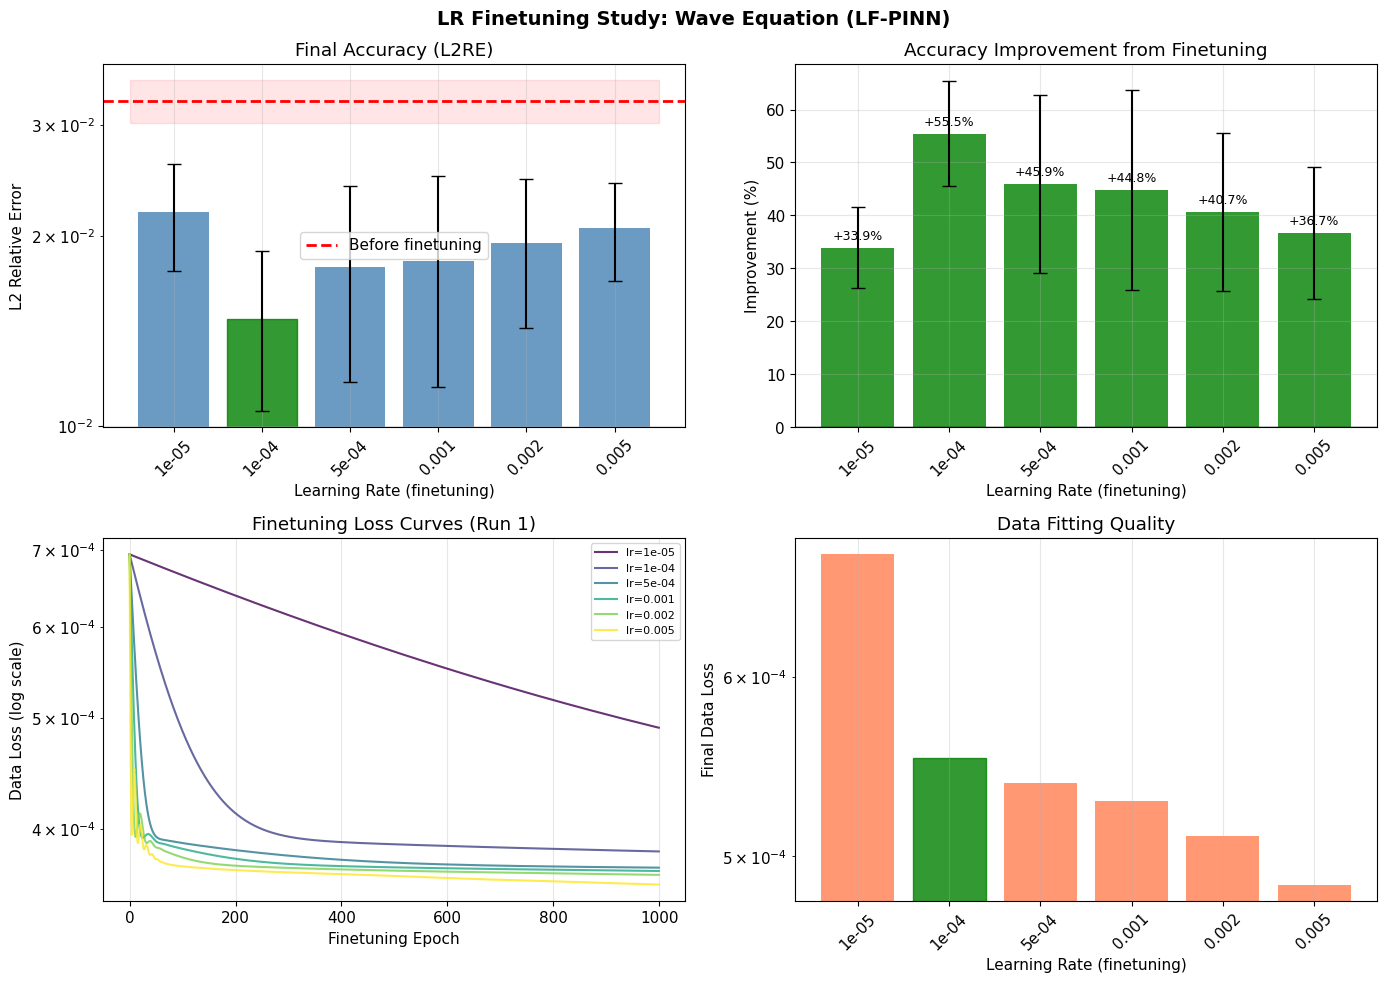


LR Finetuning Study: Wave Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     3.28e-02 ± 2.54e-03         --                   --           --             
0.00001      2.18e-02 ± 4.20e-03      +33.9% ± 7.6%        1000         6.79e-04       
0.00010      1.48e-02 ± 4.19e-03      +55.5% ± 9.9%        1000         5.52e-04        ← BEST
0.00050      1.79e-02 ± 6.15e-03      +45.9% ± 16.8%       1000         5.38e-04       
0.00100      1.82e-02 ± 6.69e-03      +44.8% ± 18.8%       1000         5.29e-04       
0.00200      1.95e-02 ± 5.16e-03      +40.7% ± 14.9%       1000         5.11e-04       
0.00500      2.06e-02 ± 3.64e-03      +36.7% ± 12.4%       1000         4.86e-04       


In [12]:
results_wave = test_lr_data_finetuning(
    'wave',
    n_runs=5,
    pretrain_epochs=150,
    finetune_epochs=1000,
    n_data=50,
    noise_level=0.05,
    correction_mode='time_gate+rhs_scale'
)

best_lr = plot_lr_finetuning_comparison(results_wave, 'Wave Equation')

### LR Study on Data - Burgers Equation

#### Data Correction - **None**


LR FINETUNING STUDY: BURGERS | mode=none

RUN 1/5

  [Pretrain] lr=0.0005, 200 epochs...

LF-PINN Theta Params
PDE: burgers | Mode: none
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 0
Total trainable: 13

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN


/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 4/trapezoidal_LF_model/utils/pde_utils.py:448: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  phi_x, _ = quad(integrand_phi_x, limit_low, limit_high,


  [Pretrain] Done: 200 epochs, 75.7s, L2RE=1.64e-01
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.64e-01 → 1.65e-01 (-0.6%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.64e-01 → 1.75e-01 (-6.3%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.64e-01 → 2.55e-01 (-54.9%), 1000 epochs
  [Finetune] lr=0.001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.64e-01 → 2.48e-01 (-50.9%), 1000 epochs
  [Finetune] lr=0.002... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.64e-01 → 2.46e-01 (-49.6%), 1000 epochs
  [Finetune] lr=0.005... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.64e-01 → 4.81e-01 (-19

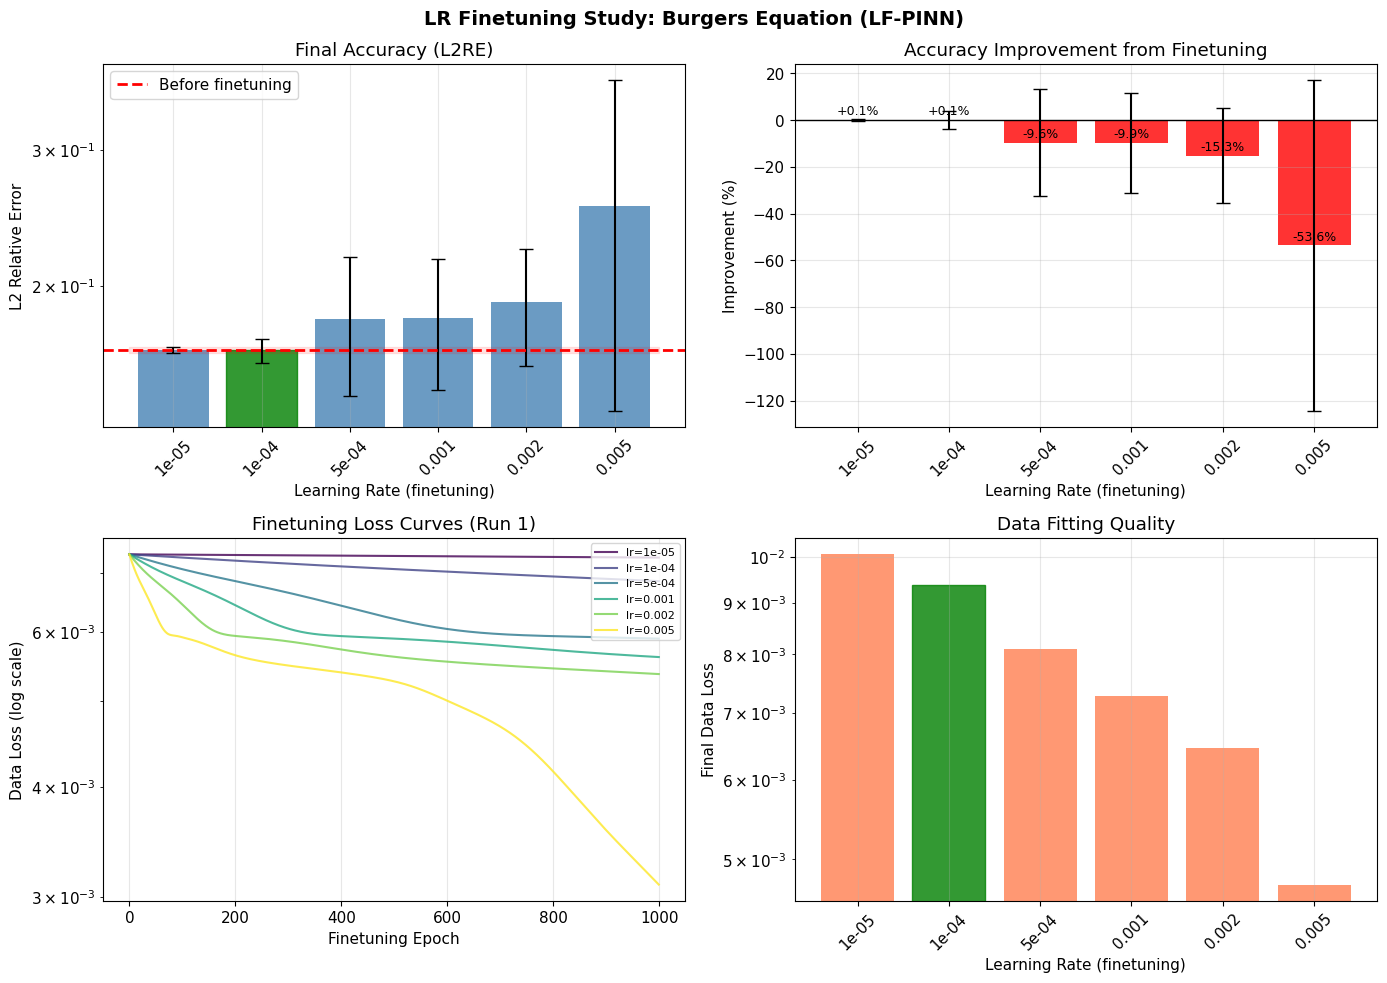


LR Finetuning Study: Burgers Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.65e-01 ± 1.45e-03         --                   --           --             
0.00001      1.65e-01 ± 1.35e-03      +0.1% ± 0.5%         1000         1.01e-02       
0.00010      1.65e-01 ± 5.89e-03      +0.1% ± 3.9%         1000         9.38e-03        ← BEST
0.00050      1.81e-01 ± 3.73e-02      -9.6% ± 22.9%        1000         8.09e-03       
0.00100      1.81e-01 ± 3.50e-02      -9.9% ± 21.5%        1000         7.28e-03       
0.00200      1.90e-01 ± 3.31e-02      -15.3% ± 20.2%       1000         6.45e-03       
0.00500      2.54e-01 ± 1.16e-01      -53.6% ± 70.6%       1000         4.72e-03       


In [13]:
results_burgers = test_lr_data_finetuning(
    'burgers',
    pretrain_epochs=200,
    finetune_epochs=1000,
    n_runs=5,
    n_data=50,
    noise_level=0.05,
    correction_mode='none'
)

best_lr = plot_lr_finetuning_comparison(results_burgers, 'Burgers Equation')

#### Data Correction - **RHS Scale**


LR FINETUNING STUDY: BURGERS | mode=rhs_scale

RUN 1/5

  [Pretrain] lr=0.0005, 200 epochs...

LF-PINN Theta Params
PDE: burgers | Mode: rhs_scale
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 2
Total trainable: 15

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN


/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 4/trapezoidal_LF_model/utils/pde_utils.py:448: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  phi_x, _ = quad(integrand_phi_x, limit_low, limit_high,


  [Pretrain] Done: 200 epochs, 76.7s, L2RE=1.64e-01
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 1.59e-01 (+3.3%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 1.30e-01 (+21.0%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 1.20e-01 (+27.0%), 1000 epochs
  [Finetune] lr=0.001... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 1.20e-01 (+27.2%), 1000 epochs
  [Finetune] lr=0.002... [ThetaParams] Corrections ENABLED (mode: rhs_scale)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base th

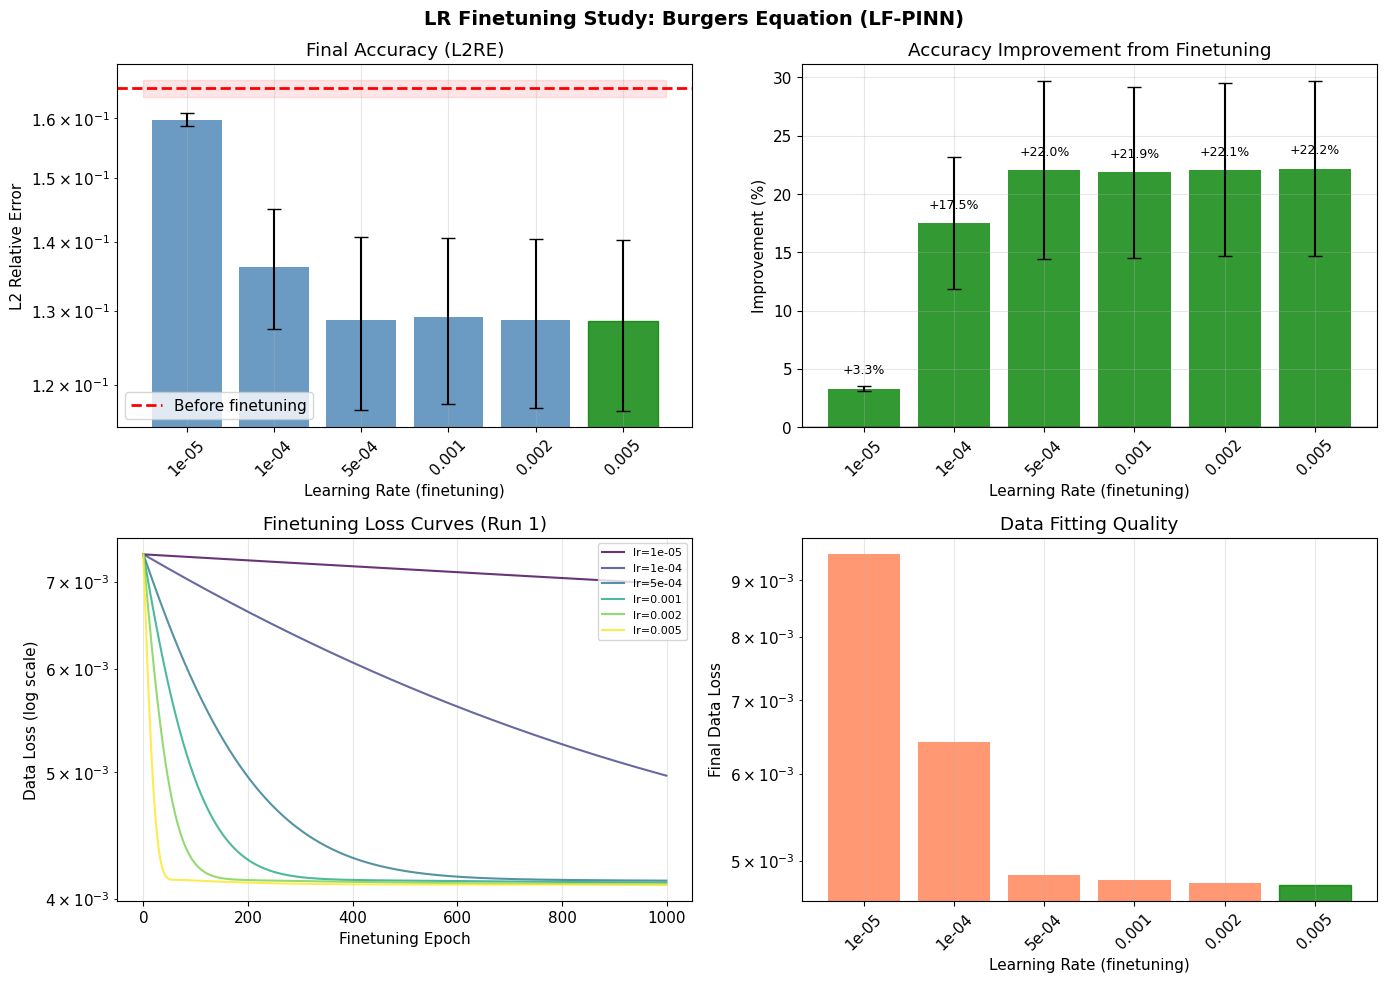


LR Finetuning Study: Burgers Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.65e-01 ± 1.45e-03         --                   --           --             
0.00001      1.60e-01 ± 1.16e-03      +3.3% ± 0.2%         1000         9.50e-03       
0.00010      1.36e-01 ± 8.84e-03      +17.5% ± 5.7%        1000         6.41e-03       
0.00050      1.29e-01 ± 1.20e-02      +22.0% ± 7.6%        1000         4.86e-03       
0.00100      1.29e-01 ± 1.16e-02      +21.9% ± 7.4%        1000         4.80e-03       
0.00200      1.29e-01 ± 1.17e-02      +22.1% ± 7.4%        1000         4.77e-03       
0.00500      1.29e-01 ± 1.18e-02      +22.2% ± 7.5%        1000         4.76e-03        ← BEST


In [14]:
results_burgers = test_lr_data_finetuning(
    'burgers',
    pretrain_epochs=200,
    finetune_epochs=1000,
    n_runs=5,
    n_data=50,
    noise_level=0.05,
    correction_mode='rhs_scale'
)

best_lr = plot_lr_finetuning_comparison(results_burgers, 'Burgers Equation')

#### Data Correction - **Per Step (Layer) Bias**


LR FINETUNING STUDY: BURGERS | mode=per_step_bias

RUN 1/5

  [Pretrain] lr=0.0005, 200 epochs...

LF-PINN Theta Params
PDE: burgers | Mode: per_step_bias
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 2
Total trainable: 15

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN


/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 4/trapezoidal_LF_model/utils/pde_utils.py:448: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  phi_x, _ = quad(integrand_phi_x, limit_low, limit_high,


  [Pretrain] Done: 200 epochs, 79.1s, L2RE=1.64e-01
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 1.67e-01 (-1.4%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 2.00e-01 (-21.4%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 2.52e-01 (-53.0%), 1000 epochs
  [Finetune] lr=0.001... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.64e-01 → 2.52e-01 (-53.1%), 1000 epochs
  [Finetune] lr=0.002... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[

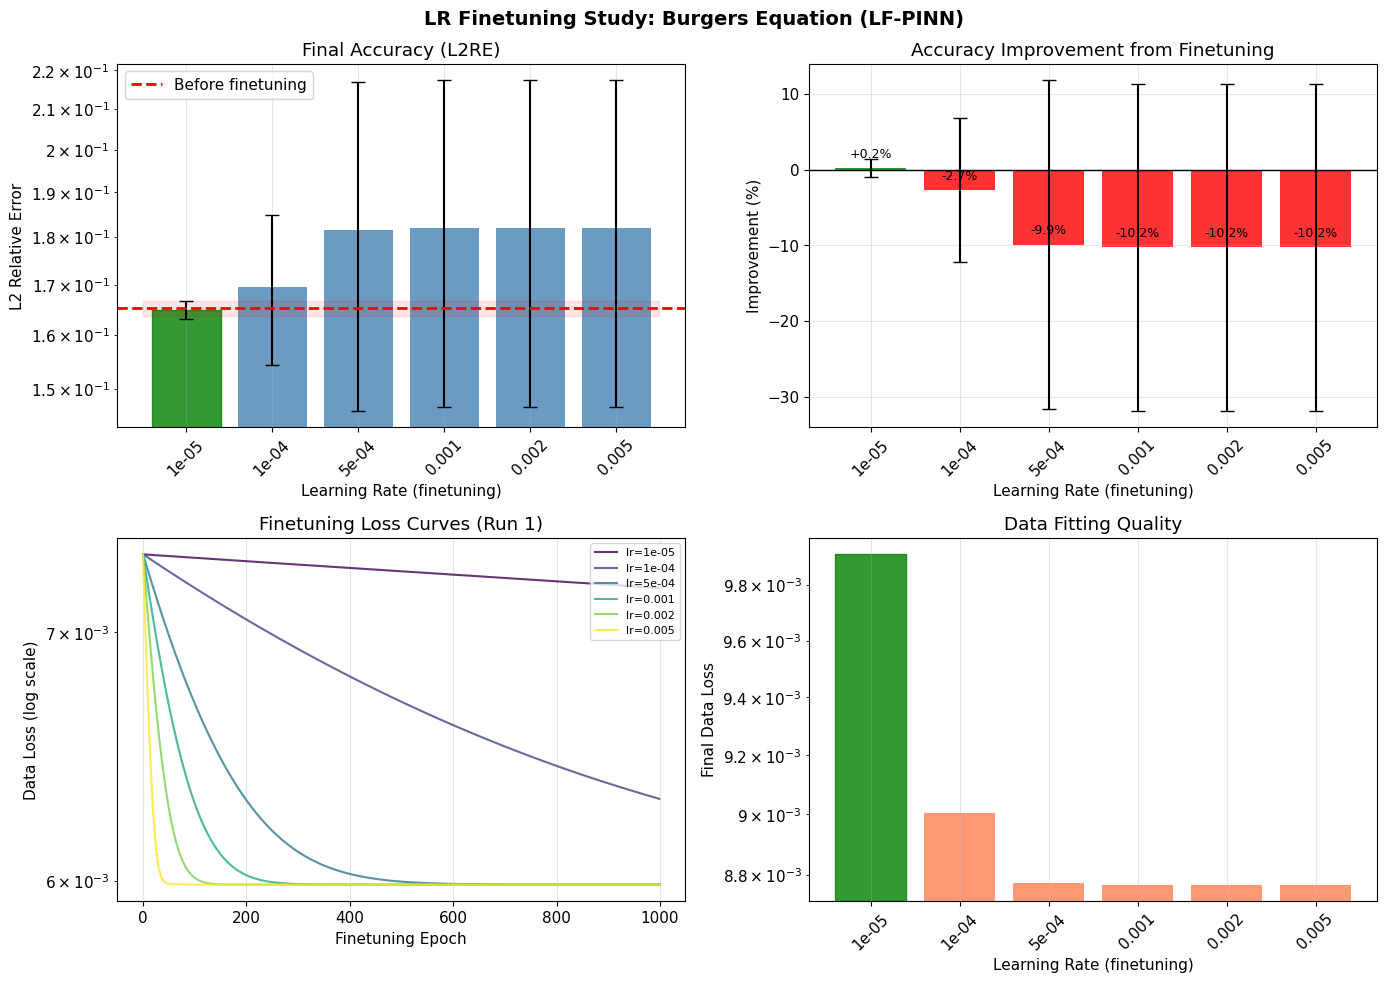


LR Finetuning Study: Burgers Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.65e-01 ± 1.45e-03         --                   --           --             
0.00001      1.65e-01 ± 1.73e-03      +0.2% ± 1.2%         1000         9.91e-03        ← BEST
0.00010      1.70e-01 ± 1.53e-02      -2.7% ± 9.5%         1000         9.01e-03       
0.00050      1.82e-01 ± 3.54e-02      -9.9% ± 21.7%        1000         8.77e-03       
0.00100      1.82e-01 ± 3.53e-02      -10.2% ± 21.6%       1000         8.77e-03       
0.00200      1.82e-01 ± 3.53e-02      -10.2% ± 21.6%       1000         8.77e-03       
0.00500      1.82e-01 ± 3.53e-02      -10.2% ± 21.6%       1000         8.77e-03       


In [15]:
results_burgers = test_lr_data_finetuning(
    'burgers',
    pretrain_epochs=200,
    finetune_epochs=1000,
    n_runs=5,
    n_data=50,
    noise_level=0.05,
    correction_mode='per_step_bias'
)

best_lr = plot_lr_finetuning_comparison(results_burgers, 'Burgers Equation')

### LR Study on Data - Reaction-Diffusion Equation

#### Data Correction - **None**


LR FINETUNING STUDY: REACTION_DIFFUSION | mode=none

RUN 1/5

  [Pretrain] lr=0.005, 110 epochs...

LF-PINN Theta Params
PDE: reaction_diffusion | Mode: none
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 0
Total trainable: 13

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 110 epochs, 49.8s, L2RE=1.36e-01
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.36e-01 → 1.36e-01 (+0.0%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.36e-01 → 1.36e-01 (+0.0%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.36e-01 → 1.36e-01 (+0.0%), 1000 epochs
  [Finetune] lr=0.001... [ThetaParams] Corrections ENABLED (mode: none)
[ThetaParams] Correction params UNFROZEN
L2RE: 1.36e-01 → 1.36e-01 (

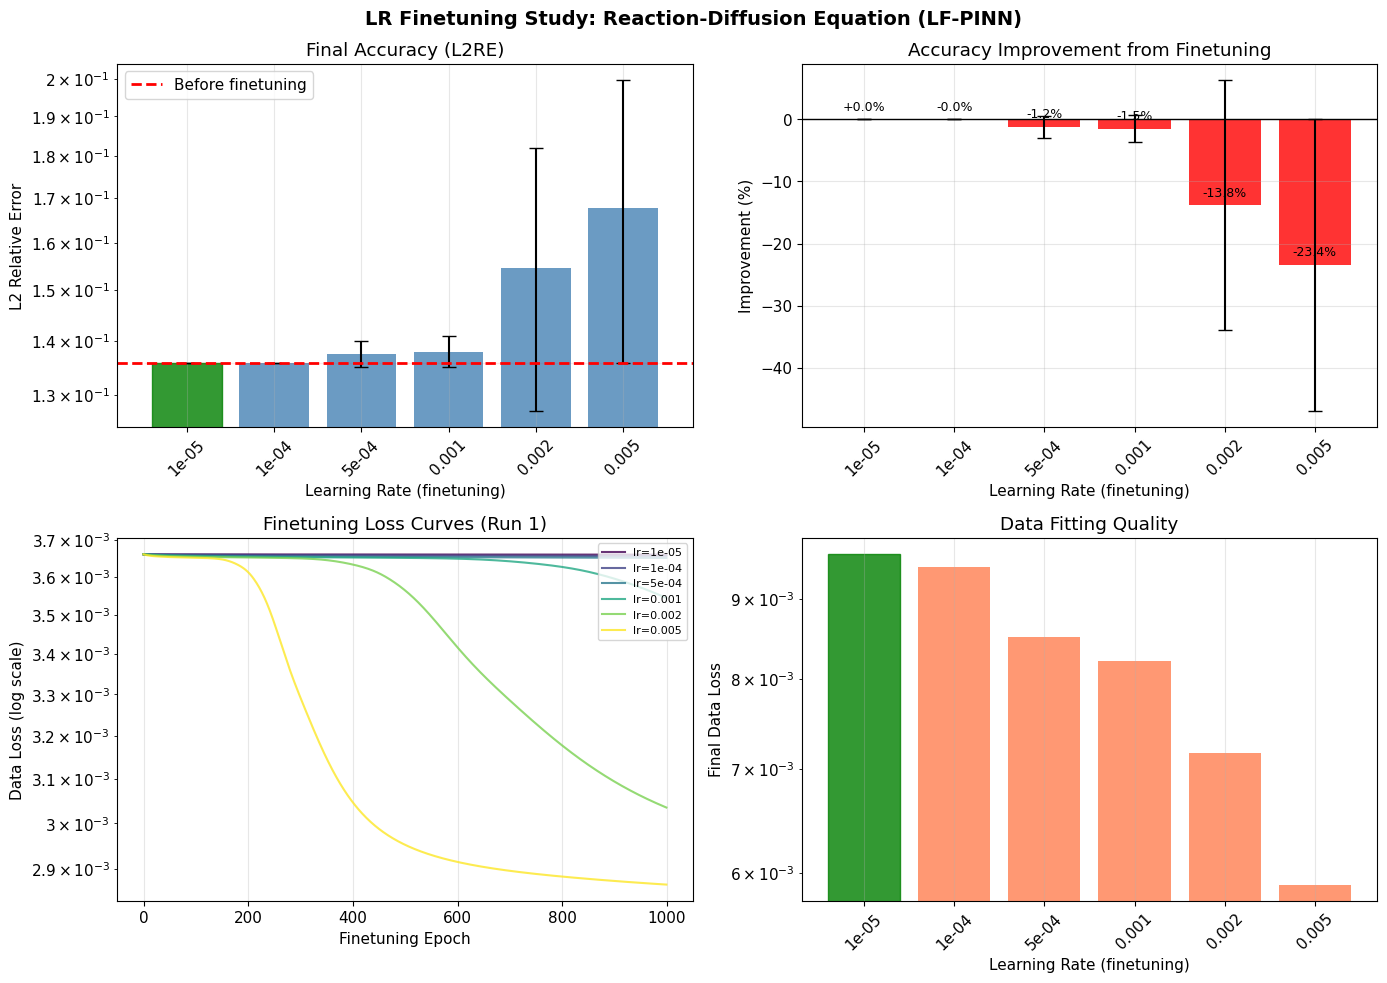


LR Finetuning Study: Reaction-Diffusion Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.36e-01 ± 1.14e-05         --                   --           --             
0.00001      1.36e-01 ± 1.05e-05      +0.0% ± 0.0%         1000         9.61e-03        ← BEST
0.00010      1.36e-01 ± 2.06e-05      -0.0% ± 0.0%         1000         9.44e-03       
0.00050      1.38e-01 ± 2.50e-03      -1.2% ± 1.8%         1000         8.50e-03       
0.00100      1.38e-01 ± 2.92e-03      -1.5% ± 2.2%         1000         8.21e-03       
0.00200      1.55e-01 ± 2.73e-02      -13.8% ± 20.1%       1000         7.17e-03       
0.00500      1.68e-01 ± 3.19e-02      -23.4% ± 23.5%       1000         5.90e-03       


In [16]:
results_rd = test_lr_data_finetuning(
    'reaction_diffusion',
    n_runs=5,
    pretrain_epochs=110,
    finetune_epochs=1000,
    n_data=50,
    noise_level=0.05,
    correction_mode='none'
)

best_lr = plot_lr_finetuning_comparison(results_rd, 'Reaction-Diffusion Equation')

#### Data Correction - **Output Bias**


LR FINETUNING STUDY: REACTION_DIFFUSION | mode=output_bias

RUN 1/5

  [Pretrain] lr=0.005, 110 epochs...

LF-PINN Theta Params
PDE: reaction_diffusion | Mode: output_bias
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 2
Total trainable: 15

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 110 epochs, 46.8s, L2RE=1.36e-01
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: output_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.36e-01 → 1.28e-01 (+5.8%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: output_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.36e-01 → 1.26e-01 (+7.6%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: output_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.36e-01 → 1.26e-01 (+7.6%), 1000 epoc

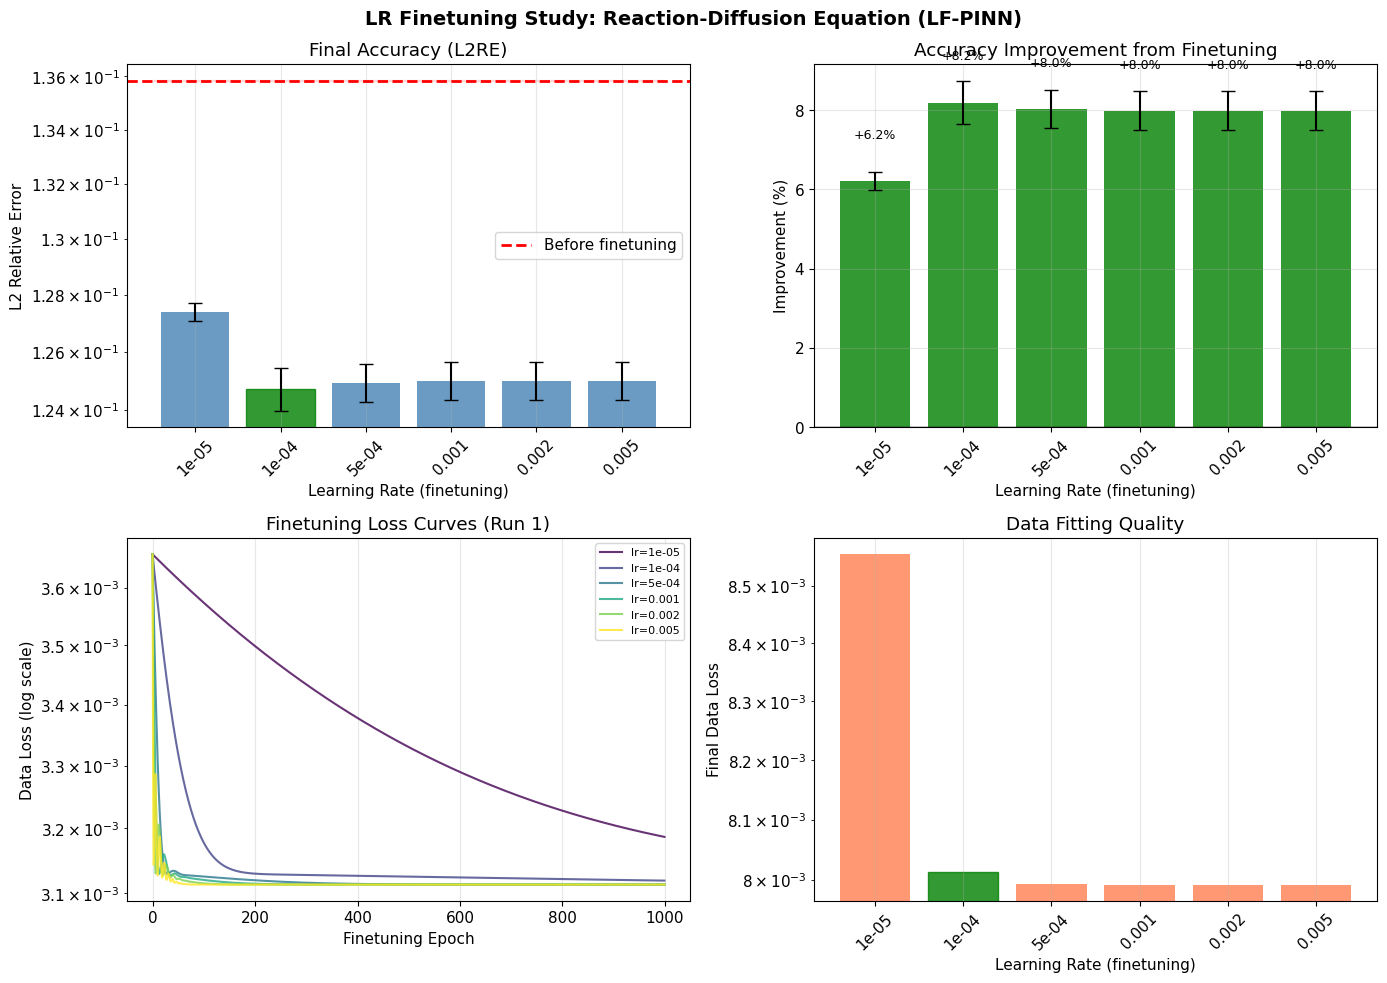


LR Finetuning Study: Reaction-Diffusion Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.36e-01 ± 1.14e-05         --                   --           --             
0.00001      1.27e-01 ± 3.20e-04      +6.2% ± 0.2%         1000         8.56e-03       
0.00010      1.25e-01 ± 7.33e-04      +8.2% ± 0.5%         1000         8.01e-03        ← BEST
0.00050      1.25e-01 ± 6.42e-04      +8.0% ± 0.5%         1000         7.99e-03       
0.00100      1.25e-01 ± 6.61e-04      +8.0% ± 0.5%         1000         7.99e-03       
0.00200      1.25e-01 ± 6.63e-04      +8.0% ± 0.5%         1000         7.99e-03       
0.00500      1.25e-01 ± 6.63e-04      +8.0% ± 0.5%         1000         7.99e-03       


In [17]:
results_rd = test_lr_data_finetuning(
    'reaction_diffusion',
    n_runs=5,
    pretrain_epochs=110,
    finetune_epochs=1000,
    n_data=50,
    noise_level=0.05,
    correction_mode='output_bias'
)

best_lr = plot_lr_finetuning_comparison(results_rd, 'Reaction-Diffusion Equation')

#### Data Correction - **Per Step (Layer) Bias**


LR FINETUNING STUDY: REACTION_DIFFUSION | mode=per_step_bias

RUN 1/5

  [Pretrain] lr=0.005, 110 epochs...

LF-PINN Theta Params
PDE: reaction_diffusion | Mode: per_step_bias
Steps: 2 | Iterations: 2
Base theta_net params: 13
Correction params: 2
Total trainable: 15

[ThetaParams] Corrections DISABLED
[ThetaParams] Correction params FROZEN
  [Pretrain] Done: 110 epochs, 46.7s, L2RE=1.36e-01
  [Finetune] lr=1e-05... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.36e-01 → 1.36e-01 (+0.0%), 1000 epochs
  [Finetune] lr=0.0001... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.36e-01 → 1.36e-01 (+0.2%), 1000 epochs
  [Finetune] lr=0.0005... [ThetaParams] Corrections ENABLED (mode: per_step_bias)
[ThetaParams] Correction params UNFROZEN
[ThetaParams] Base theta_net FROZEN
L2RE: 1.36e-01 → 1.37e-01 (-0.8%),

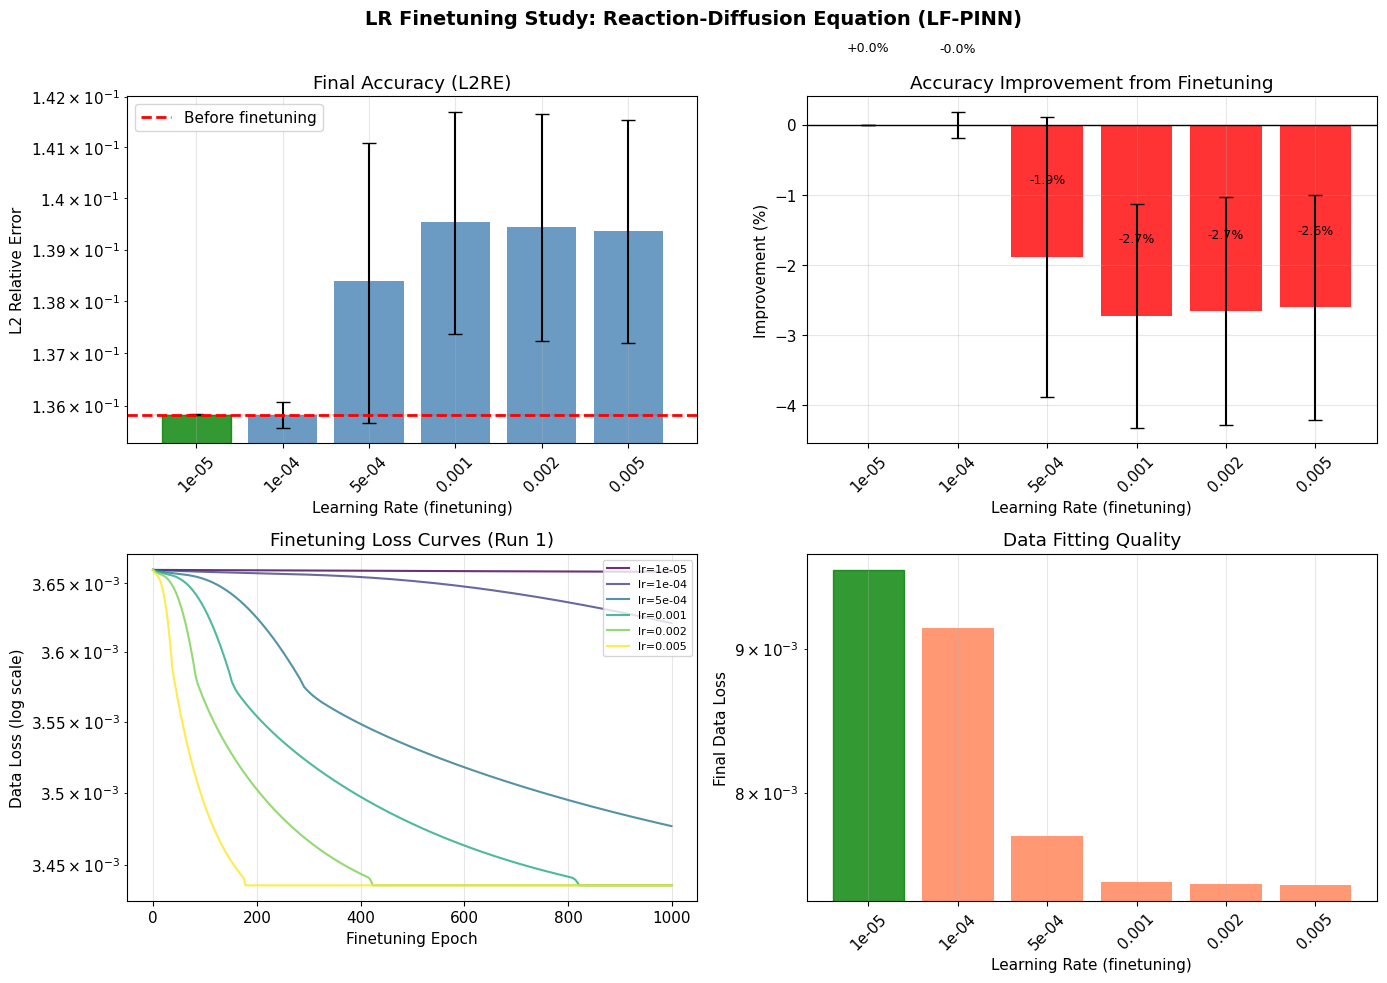


LR Finetuning Study: Reaction-Diffusion Equation (LF-PINN)
LR           L2RE After               Improvement          Epochs       Data Loss      
----------------------------------------------------------------------------------------------------
baseline     1.36e-01 ± 1.14e-05         --                   --           --             
0.00001      1.36e-01 ± 1.00e-05      +0.0% ± 0.0%         1000         9.60e-03        ← BEST
0.00010      1.36e-01 ± 2.47e-04      -0.0% ± 0.2%         1000         9.15e-03       
0.00050      1.38e-01 ± 2.71e-03      -1.9% ± 2.0%         1000         7.73e-03       
0.00100      1.40e-01 ± 2.16e-03      -2.7% ± 1.6%         1000         7.44e-03       
0.00200      1.39e-01 ± 2.21e-03      -2.7% ± 1.6%         1000         7.43e-03       
0.00500      1.39e-01 ± 2.17e-03      -2.6% ± 1.6%         1000         7.42e-03       


In [18]:
results_rd = test_lr_data_finetuning(
    'reaction_diffusion',
    n_runs=5,
    pretrain_epochs=110,
    finetune_epochs=1000,
    n_data=50,
    noise_level=0.05,
    correction_mode='per_step_bias'
)

best_lr = plot_lr_finetuning_comparison(results_rd, 'Reaction-Diffusion Equation')